In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model_seed_vector import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 3000
N_bar = 3000
num_states = 100

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(N_inp, N_bar, num_states, steps=200)

# Example Activity (without learning)

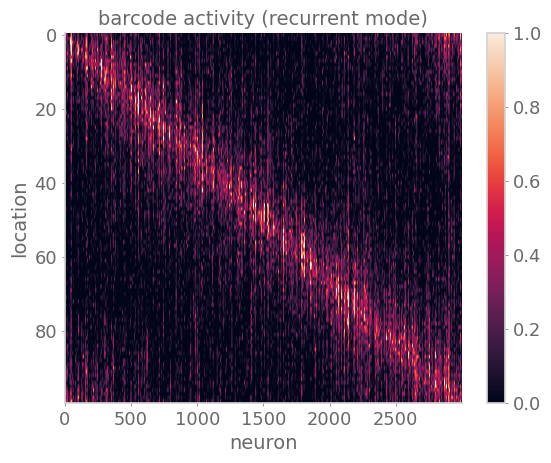

In [4]:
_, acts, _, acts_over_time = model.run_recurrent(place_inputs)

plt.imshow(acts, vmin=0, vmax=1, aspect='auto')
plt.xlabel("neuron")
plt.ylabel("location")
plt.colorbar()
plt.title("barcode activity (recurrent mode)")
plt.show()


# Figure 1B

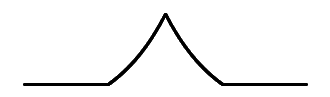

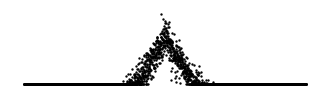

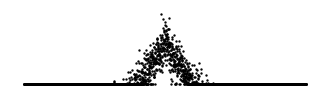

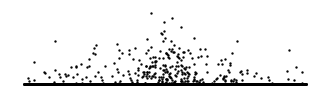

In [5]:
for t in [0, 1, 2, 99]:
    fig, ax = plt.subplots(figsize=(4,1))
    plt.scatter(
        np.arange(N_bar), acts_over_time[t, num_states//2],
        color='black', s=0.5
        )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.show()

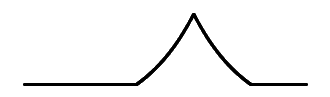

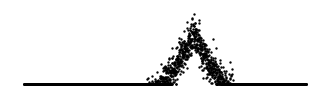

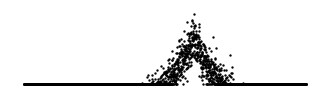

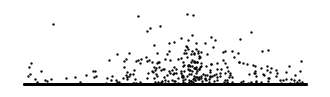

In [6]:
for t in [0, 1, 2, 99]:
    fig, ax = plt.subplots(figsize=(4,1))
    plt.scatter(
        np.arange(N_bar), acts_over_time[t, num_states//2+10],
        color='black', s=0.5
        )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.show()

# SFig 1

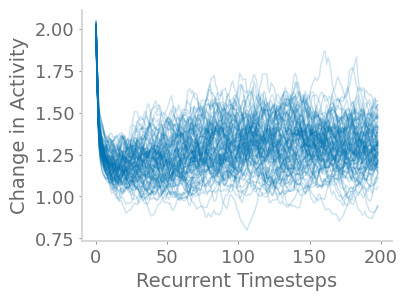

In [7]:
plt.figure(figsize=(4,3))
for s in range(100):
    diffs = []
    prev_act = acts_over_time[0, s]
    for t in range(1, 200):
        curr_act = acts_over_time[t, s]
        diffs.append(np.linalg.norm(curr_act - prev_act))
        prev_act = curr_act
    plt.plot(diffs, color='C0', alpha=0.2)
plt.xlabel('Recurrent Timesteps')
plt.ylabel('Change in Activity')
plt.show()